In [ ]:
!pip install pmdarima

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
# import tất cả các thư viện

import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import time
from pmdarima.arima.utils import ndiffs
import statsmodels.api as sm
from statsmodels.graphics.tsaplots import plot_pacf, plot_acf
from statsmodels.tsa.stattools import acf, pacf
from statsmodels.tsa.arima.model import ARIMA
from math import sqrt
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error,  mean_absolute_error

import warnings
warnings.filterwarnings("ignore")

In [ ]:
df = pd.read_csv('DataAirTrain.csv', parse_dates=["time"]) 
df.set_index("time", inplace = True)
df

,Unnamed: 0,Unnamed: 0.1,Barometer,Temp,NO,PM-10,RH,Radiation,WindDir,SO2,...,PM-2-5,CO,PM-1,O3,Wind Spd,TSP,Hướng gió,Nhiệt độ,Áp suất khí quyển,Wind Spd (sai)
time,,,,,,,,,,,,,,,,,,,,,
2019-04-14 07:00:00,0,0,1010.280000,25.550000,18.57,18.12,98.55,0.01,188.880000,19.17,...,7.48,461.82,3.43,-17.17,1.480000,31.02,NaN,NaN,NaN,NaN
2019-04-14 08:00:00,1,1,1011.210000,25.170000,11.61,17.25,99.62,32.83,194.240000,13.49,...,7.63,595.40,3.43,-3.70,1.550000,31.13,NaN,NaN,NaN,NaN
2019-04-14 09:00:00,2,2,1012.360000,25.860000,8.79,12.04,97.46,311.73,108.600000,6.68,...,5.31,553.42,2.43,3.09,1.240000,21.29,NaN,NaN,NaN,NaN
2019-04-14 10:00:00,3,3,1012.660000,27.670000,11.33,10.91,88.45,532.91,119.740000,5.77,...,4.48,446.55,2.14,8.60,1.780000,19.24,NaN,NaN,NaN,NaN
2019-04-14 11:00:00,4,4,1012.780000,29.140000,5.50,8.91,77.99,610.51,116.880000,5.72,...,3.68,435.10,1.87,33.08,1.560000,18.48,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-05-09 02:00:00,3409,3409,1006.197202,24.618810,2.31,12.86,62.53,NaN,177.290079,70.69,...,5.44,122.13,2.98,91.97,0.994953,23.62,103.96,30.69,1002.97,2.46
2019-05-09 03:00:00,3410,3410,1004.847083,27.431410,2.30,10.30,62.61,NaN,131.708012,72.00,...,5.37,114.50,3.01,90.53,1.789547,18.27,84.25,30.64,1002.61,2.57
2019-05-09 04:00:00,3411,3411,1004.401372,24.187061,2.47,10.48,62.80,NaN,148.633002,73.61,...,5.32,110.68,2.98,88.60,1.083361,17.82,74.20,30.63,1002.26,3.08


In [ ]:
# lấy cột PM-10 ra để dự báo
df_sarima = df[["PM-10"]].copy()

#df_sarima["time"] = df["time"]
#df_sarima.set_index("time" ,inplace=True)
#df_sarima.head(4)

In [ ]:
df.info

<bound method DataFrame.info of                      Unnamed: 0  Unnamed: 0.1    Barometer       Temp     NO  \
time                                                                           
2019-04-14 07:00:00           0             0  1010.280000  25.550000  18.57   
2019-04-14 08:00:00           1             1  1011.210000  25.170000  11.61   
2019-04-14 09:00:00           2             2  1012.360000  25.860000   8.79   
2019-04-14 10:00:00           3             3  1012.660000  27.670000  11.33   
2019-04-14 11:00:00           4             4  1012.780000  29.140000   5.50   
...                         ...           ...          ...        ...    ...   
2019-05-09 02:00:00        3409          3409  1006.197202  24.618810   2.31   
2019-05-09 03:00:00        3410          3410  1004.847083  27.431410   2.30   
2019-05-09 04:00:00        3411          3411  1004.401372  24.187061   2.47   
2019-05-09 05:00:00        3412          3412  1009.252225  30.123856   2.48   
2019-05-

In [ ]:
# xử lý số liệu thiếu

#df_sarima=df_sarima.asfreq('H')
df_sarima.fillna(int(df_sarima['PM-10'].mean()), inplace=True)
df_sarima.isnull().sum()


PM-10    0
dtype: int64

In [ ]:
df_sarima.isnull().sum()

PM-10    0
dtype: int64

In [ ]:
df_sarima.info

<bound method DataFrame.info of       PM-10
0     18.12
1     17.25
2     12.04
3     10.91
4      8.91
...     ...
3409  12.86
3410  10.30
3411  10.48
3412  11.45
3413  14.54

[3414 rows x 1 columns]>

In [ ]:
ndiffs(df_sarima, test="adf")

0

<BarContainer object of 30 artists>

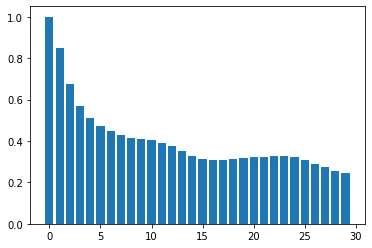

In [ ]:
acf_vals = acf(df_sarima)
num_lags = 30
plt.bar(range(num_lags), acf_vals[:num_lags])

<BarContainer object of 31 artists>

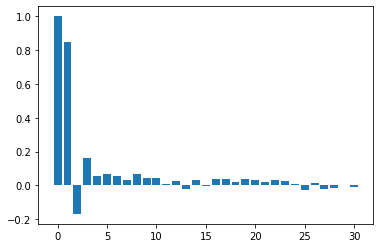

In [ ]:
pacf_vals = pacf(df_sarima)
num_lags = 31
plt.bar(range(num_lags), pacf_vals[:num_lags])

Nhìn vào acf, pacf, sesonal decompose, ta thấy không có yếu tố mùa. Vì vậy chọn ARMA với p = 5, q = 5.

In [ ]:
# tách 2 tập train test

n = int(len(df_sarima)-48)


train = df_sarima[:n]
test = df_sarima[n:]
print(len(train))
print(len(test))
print(len(df_sarima))


2731
683
3414


In [ ]:
step = len(test)
order = (10, 0, 1)
model = ARIMA(train, order=order)
result = model.fit(method='innovations_mle')

# Forecast
fc=result.forecast(steps=step)
print(fc)

2731    32.243631
2732    31.980596
2733    30.864059
2734    31.279643
2735    31.249443
          ...    
3409    21.114121
3410    21.114121
3411    21.114121
3412    21.114121
3413    21.114121
Name: predicted_mean, Length: 683, dtype: float64


In [ ]:
fc = pd.Series(fc, index=test[:step].index)
#lower = pd.Series(conf[:, 0], index=test[:step].index)
#upper = pd.Series(conf[:, 1], index=test[:step].index)
print(fc)

2731    32.243631
2732    31.980596
2733    30.864059
2734    31.279643
2735    31.249443
          ...    
3409    21.114121
3410    21.114121
3411    21.114121
3412    21.114121
3413    21.114121
Name: predicted_mean, Length: 683, dtype: float64


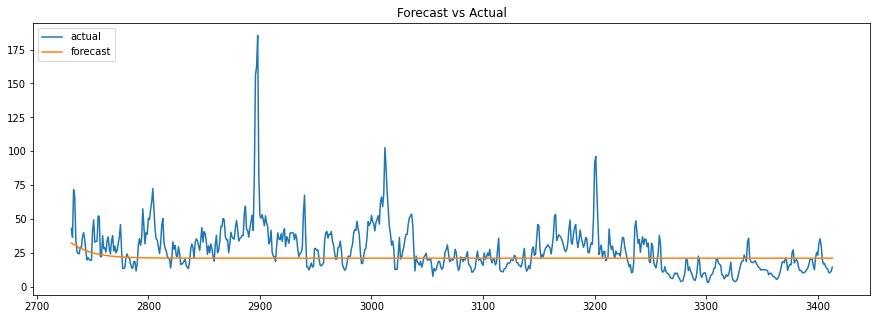

In [ ]:
plt.figure(figsize=(15, 5))
plt.plot(test[:step], label="actual")
#plt.plot(df_sarima[:], label="actual")
plt.plot(fc, label="forecast")
#plt.fill_between(lower.index, lower, upper, color="k", alpha=0.1)
plt.title("Forecast vs Actual")
plt.legend(loc="upper left")


In [ ]:
model = ARIMA(train, order=order)
fitted = model.fit(method='innovations_mle')

# Forecast


In [ ]:

print(fc)

3366     9.734671
3367    11.128755
3368    11.863839
3369    12.316313
3370    12.760124
3371    13.246187
3372    13.671302
3373    13.912833
3374    13.994615
3375    14.058003
3376    14.249868
3377    14.570340
3378    14.896111
3379    15.088428
3380    15.142247
3381    15.173555
3382    15.318807
3383    15.590857
3384    15.883014
3385    16.062797
3386    16.111207
3387    16.126607
3388    16.237842
3389    16.469860
3390    16.732754
3391    16.901885
3392    16.947333
3393    16.951189
3394    17.034052
3395    17.230539
3396    17.466375
3397    17.625431
3398    17.669239
3399    17.664863
3400    17.724135
3401    17.889120
3402    18.099905
3403    18.249293
3404    18.292365
3405    18.282455
3406    18.322311
3407    18.459482
3408    18.647108
3409    18.787144
3410    18.830063
3411    18.816791
3412    18.840865
3413    18.953595
Name: predicted_mean, dtype: float64


In [ ]:

mean_squared_error(fc, test)


326.9773097548304

In [ ]:
 mean_absolute_error(fc,test)

11.669786351909535